In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scr.code as scd

In [2]:
df = pd.read_csv("Data/AviationDataClean.csv", index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48600 entries, 1 to 88877
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                48600 non-null  object 
 1   Investigation.Type      48600 non-null  object 
 2   Accident.Number         48600 non-null  object 
 3   Event.Date              48600 non-null  object 
 4   Location                48589 non-null  object 
 5   Country                 48461 non-null  object 
 6   Latitude                16410 non-null  object 
 7   Longitude               16409 non-null  object 
 8   Airport.Code            29889 non-null  object 
 9   Airport.Name            31427 non-null  object 
 10  Injury.Severity         48571 non-null  object 
 11  Aircraft.damage         48405 non-null  object 
 12  Aircraft.Category       14786 non-null  object 
 13  Registration.Number     48585 non-null  object 
 14  Make                    48600 non-null  obj

/var/folders/0_/jyfznr0x5q53rj2pvwf26qbw0000gn/T/ipykernel_52366/734652658.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Data/AviationDataClean.csv", index_col=0)


In [3]:
df = df.dropna(subset='Model')

In [4]:
df['Make_Model'] = df[['Make', 'Model']].apply(lambda x: '-'.join(x), axis=1)
df.head().T

,1,2,6,7,8
Event.Id,20001218X45447,20061025X01555,20001218X45446,20020909X01562,20020909X01561
Investigation.Type,Accident,Accident,Accident,Accident,Accident
Accident.Number,LAX94LA336,NYC07LA005,CHI81LA106,SEA82DA022,NYC82DA015
Event.Date,1962-07-19,1974-08-30,1981-08-01,1982-01-01,1982-01-01
Location,"BRIDGEPORT, CA","Saltville, VA","COTTON, MN","PULLMAN, WA","EAST HANOVER, NJ"
Country,United States,United States,United States,United States,United States
Latitude,NaN,36.922223,NaN,NaN,NaN
Longitude,NaN,-81.878056,NaN,NaN,NaN
Airport.Code,NaN,NaN,NaN,NaN,N58
Airport.Name,NaN,NaN,NaN,BLACKBURN AG STRIP,HANOVER


In [5]:
dfC = df[df['Make'] == 'Cessna']

In [6]:
CessnaGB = dfC.groupby('Make_Model').count().sort_values(by='Event.Id', ascending=False)
top_five = CessnaGB.index[:5]
top_five

Index(['Cessna-152', 'Cessna-172', 'Cessna-172N', 'Cessna-150', 'Cessna-172M'], dtype='object', name='Make_Model')

In [7]:
#CessnaGB1 = CessnaGB[CessnaGB['Event.Id'] >= 100]
#CessnaGB1.shape


In [8]:
# Cessna -> Fatal: 

Cessna_ave_fraction_fatal = dfC[["Make_Model","Fraction_fatal"]].groupby("Make_Model").mean()
Cessna_ave_fraction_fatal


,Fraction_fatal
Make_Model,
Cessna-0-1A,0.000000
Cessna-120,0.069182
Cessna-140,0.062657
Cessna-140A,0.081081
Cessna-145,0.000000
...,...
Cessna-U206D,0.000000
Cessna-U206E,0.281250
Cessna-U206F,0.237838


In [9]:
Cessna_ave_fraction_u = dfC[["Make_Model","Fraction_uninjured"]].groupby("Make_Model").mean()
Cessna_ave_fraction_u

,Fraction_uninjured
Make_Model,
Cessna-0-1A,1.000000
Cessna-120,0.713836
Cessna-140,0.715539
Cessna-140A,0.743243
Cessna-145,0.000000
...,...
Cessna-U206D,1.000000
Cessna-U206E,0.473958
Cessna-U206F,0.531982


In [10]:
x = pd.DataFrame([(x, float(Cessna_ave_fraction_fatal.loc[x])) for x in top_five]).sort_values(by=1)


/var/folders/0_/jyfznr0x5q53rj2pvwf26qbw0000gn/T/ipykernel_52366/140394494.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = pd.DataFrame([(x, float(Cessna_ave_fraction_fatal.loc[x])) for x in top_five]).sort_values(by=1)


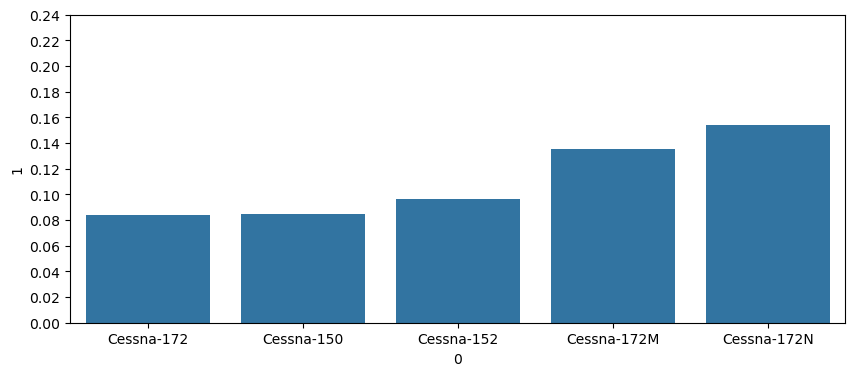

In [11]:
fig, ax = plt.subplots(figsize = (10,4))

sns.barplot(data=x, x=0, y = 1)
ax.set_yticks(np.arange(0,0.26, 0.02))

In [12]:
dfB = df[df['Make'] == 'Bell']

In [13]:
BellGB = dfB.groupby('Make_Model').count().sort_values(by='Event.Id', ascending=False)
top_five = BellGB.index[:5]
top_five

Index(['Bell-206B', 'Bell-206L-1', 'Bell-206', 'Bell-47G', 'Bell-407'], dtype='object', name='Make_Model')

In [14]:
Bell_ave_fraction_fatal = dfB[["Make_Model","Fraction_fatal"]].groupby("Make_Model").mean()
Bell_ave_fraction_fatal

,Fraction_fatal
Make_Model,
Bell-12,0.000000
Bell-204,0.333333
Bell-204 UH 1B,0.000000
Bell-204-B,0.000000
Bell-204B,0.312500
...,...
Bell-UH-IB,0.000000
Bell-UH1B,0.400000
Bell-UH1F,0.000000


In [15]:
x = pd.DataFrame([(x, float(Bell_ave_fraction_fatal.loc[x])) for x in top_five]).sort_values(by=1)

/var/folders/0_/jyfznr0x5q53rj2pvwf26qbw0000gn/T/ipykernel_52366/3314337314.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = pd.DataFrame([(x, float(Bell_ave_fraction_fatal.loc[x])) for x in top_five]).sort_values(by=1)


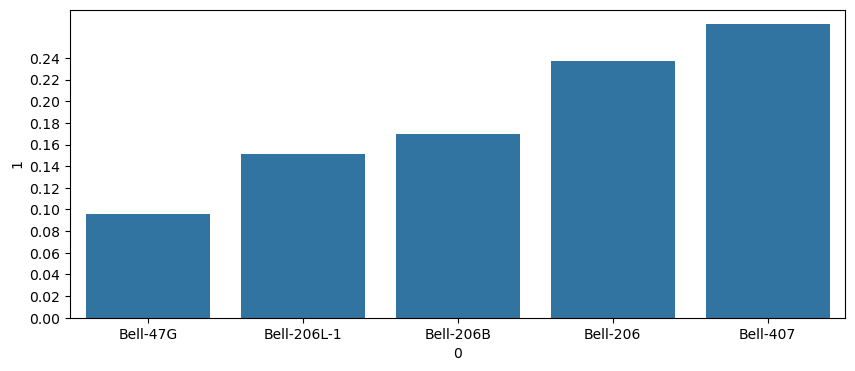

In [16]:
fig, ax = plt.subplots(figsize = (10,4))

sns.barplot(data=x, x=0, y = 1)
ax.set_yticks(np.arange(0,0.26, 0.02))

In [17]:
dfP = df[df['Make'] == 'Piper']

In [18]:
PiperGB = dfP.groupby('Make_Model').count().sort_values(by='Event.Id', ascending=False)
top_five = PiperGB.index[:5]
top_five

Index(['Piper-PA-28-140', 'Piper-PA-18-150', 'Piper-PA-18', 'Piper-PA-28-180',
       'Piper-PA-28-161'],
      dtype='object', name='Make_Model')

In [19]:
Piper_ave_fraction_fatal = dfP[["Make_Model","Fraction_fatal"]].groupby("Make_Model").mean()
Piper_ave_fraction_fatal

,Fraction_fatal
Make_Model,
Piper-18,0.375
Piper-18-150,1.000
Piper-180,0.000
Piper-20,0.000
Piper-22,0.000
...,...
Piper-PT-46,0.000
Piper-Saratoga II TC PA32-,0.000
Piper-Seneca,0.000


In [20]:
x = pd.DataFrame([(x, float(Piper_ave_fraction_fatal.loc[x])) for x in top_five]).sort_values(by=1)

/var/folders/0_/jyfznr0x5q53rj2pvwf26qbw0000gn/T/ipykernel_52366/2458020303.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = pd.DataFrame([(x, float(Piper_ave_fraction_fatal.loc[x])) for x in top_five]).sort_values(by=1)


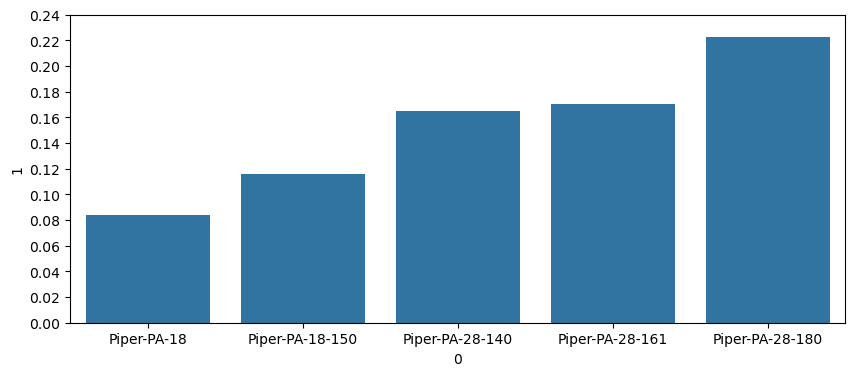

In [21]:
fig, ax = plt.subplots(figsize = (10,4))

sns.barplot(data=x, x=0, y = 1)
ax.set_yticks(np.arange(0,0.26, 0.02))

-----------------------------------------------

In [22]:
dfC = df[df['Make'] == 'Cessna']
CessnaGB = dfC.groupby('Make_Model').count().sort_values(by='Event.Id', ascending=False)
top_five = CessnaGB.index[:5]
top_five
Cessna_ave_fraction_uninjured = dfC[["Make_Model","Fraction_uninjured"]].groupby("Make_Model").mean()
Cessna_ave_fraction_uninjured

,Fraction_uninjured
Make_Model,
Cessna-0-1A,1.000000
Cessna-120,0.713836
Cessna-140,0.715539
Cessna-140A,0.743243
Cessna-145,0.000000
...,...
Cessna-U206D,1.000000
Cessna-U206E,0.473958
Cessna-U206F,0.531982


In [23]:
x = pd.DataFrame([(x, float(Cessna_ave_fraction_uninjured.loc[x])) for x in top_five]).sort_values(by=1)

/var/folders/0_/jyfznr0x5q53rj2pvwf26qbw0000gn/T/ipykernel_52366/1881170461.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = pd.DataFrame([(x, float(Cessna_ave_fraction_uninjured.loc[x])) for x in top_five]).sort_values(by=1)


<Axes: xlabel='0', ylabel='1'>

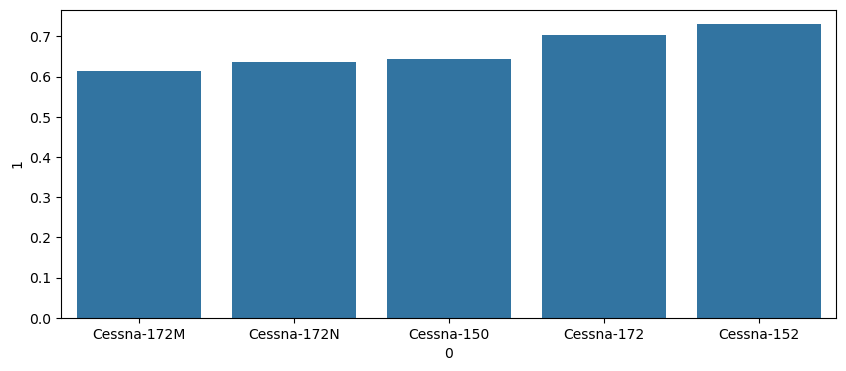

In [24]:
fig, ax = plt.subplots(figsize = (10,4))

sns.barplot(data=x, x=0, y = 1)
# ax.set_yticks(np.arange(0,0.26, 0.02))

In [25]:
dfB = df[df['Make'] == 'Bell']
BellGB = dfB.groupby('Make_Model').count().sort_values(by='Event.Id', ascending=False)
top_five = BellGB.index[:5]
top_five
Bell_ave_fraction_uninjured = dfB[["Make_Model","Fraction_uninjured"]].groupby("Make_Model").mean()
Bell_ave_fraction_uninjured

,Fraction_uninjured
Make_Model,
Bell-12,0.833333
Bell-204,0.666667
Bell-204 UH 1B,1.000000
Bell-204-B,0.625000
Bell-204B,0.250000
...,...
Bell-UH-IB,0.000000
Bell-UH1B,0.600000
Bell-UH1F,0.000000


In [26]:
x = pd.DataFrame([(x, float(Bell_ave_fraction_uninjured.loc[x])) for x in top_five]).sort_values(by=1)

/var/folders/0_/jyfznr0x5q53rj2pvwf26qbw0000gn/T/ipykernel_52366/876712669.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = pd.DataFrame([(x, float(Bell_ave_fraction_uninjured.loc[x])) for x in top_five]).sort_values(by=1)


<Axes: xlabel='0', ylabel='1'>

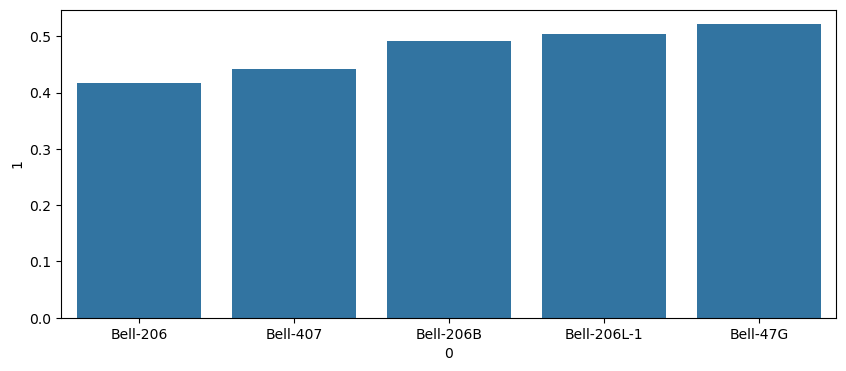

In [27]:
fig, ax = plt.subplots(figsize = (10,4))

sns.barplot(data=x, x=0, y = 1)
# ax.set_yticks(np.arange(0,0.26, 0.02))

In [28]:
# def hi(word):
#     dfB = df[df['Make'] == word]
#     BellGB = dfB.groupby('Make_Model').count().sort_values(by='Event.Id', ascending=False)
#     top_five = BellGB.index[:5]
#     top_five
#     Bell_ave_fraction_uninjured = dfB[["Make_Model","Fraction_uninjured"]].groupby("Make_Model").mean()
#     Bell_ave_fraction_uninjured
    
#     x = pd.DataFrame([(x, float(Bell_ave_fraction_uninjured.loc[x])) for x in top_five]).sort_values(by=1)
    
#     fig, ax = plt.subplots(figsize = (10,4))

#     return sns.barplot(data=x, x=0, y = 1)

/Users/zachariamwaura/Documents/Flatiron/Phase_1_Project/Phase1-Airplane-Zach-Jeff/scr/code.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = pd.DataFrame([(x, float(Bell_ave_fraction_uninjured.loc[x])) for x in top_five]).sort_values(by=1)


<Axes: xlabel='0', ylabel='1'>

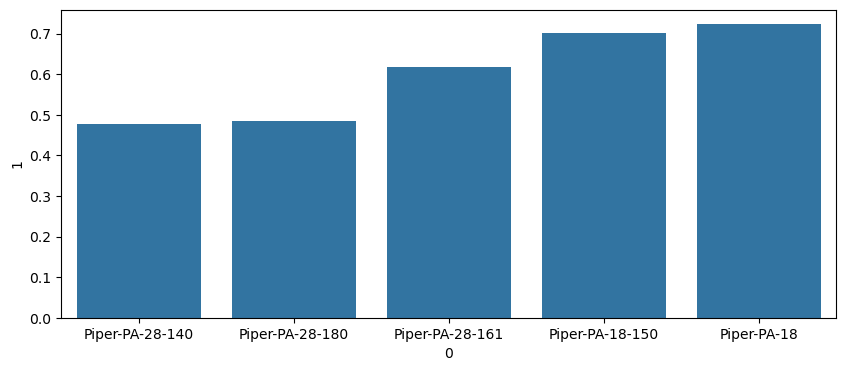

In [29]:
scd.hi(df, 'Piper')


/Users/zachariamwaura/Documents/Flatiron/Phase_1_Project/Phase1-Airplane-Zach-Jeff/scr/code.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = pd.DataFrame([(x, float(Bell_ave_fraction_uninjured.loc[x])) for x in top_five]).sort_values(by=1)


<Axes: xlabel='0', ylabel='1'>

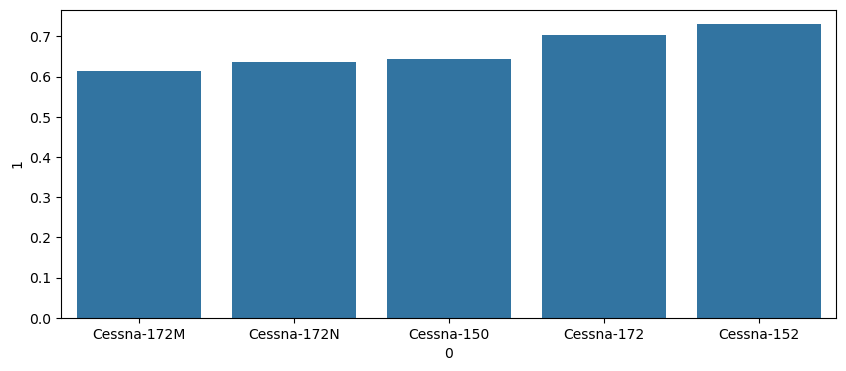

In [30]:
scd.hi(df, 'Cessna')